<font color="gray">

### 0. Ensure CUDA and torch is loaded correctly


Also ensure on Rockfish that you are using only 1/however GPUs you specified, not 4

</font>

In [ ]:
!export CUDA_VISIBLE_DEVICES=0

In [1]:
!nvidia-smi

Thu Oct 10 12:22:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-PCIE-40GB           On | 00000000:06:00.0 Off |                    0 |
| N/A   41C    P0               35W / 250W|      0MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [2]:
import torch
print(torch.cuda.device_count())

1


If the below says 10.2, you will get the `sm_80` CUDA compatibility warning

In [3]:
torch.version.cuda

'11.3'

# 1. Load Tensors

In [3]:
import torch
import pickle

# Load the tensor
all_sampled_cubes = torch.load('data/all_sampled_cubes.pt')

# Load the list of patient IDs
with open('data/all_filtered_ids.pkl', 'rb') as f:
    all_filtered_ids = pickle.load(f)


print(all_sampled_cubes.shape)
print(all_filtered_ids[:10])
assert len(all_sampled_cubes) == len(all_filtered_ids)

/var/folders/21/rybqmdj15yz5lp1lppq1761m0000gn/T/ipykernel_8602/3158749762.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  all_sampled_cubes = torch.load('data/all_sampl

torch.Size([50, 55, 96, 96, 96])
['BDMAP_00000002', 'BDMAP_00000110', 'BDMAP_00000198', 'BDMAP_00000246', 'BDMAP_00000351', 'BDMAP_00000598', 'BDMAP_00000673', 'BDMAP_00000682', 'BDMAP_00000764', 'BDMAP_00000846']


## (Optional) Save/Load Stuff from Disk

In [11]:
import os

# Define the HuggingFace repository and local path
ct_filename = "ct.nii.gz"
pancreas_segmentations_filename = "segmentations/pancreas.nii.gz"

data_folder = "./data"
healthy_pancreas_folder = os.path.join(data_folder, "healthy-pancreas")
pancreatic_tumor_folder = os.path.join(data_folder, "pancreatic-tumor")

os.makedirs(healthy_pancreas_folder, exist_ok=True)
os.makedirs(pancreatic_tumor_folder, exist_ok=True)


pancreatic_tumor_ids = [
    'BDMAP_00000087',
    'BDMAP_00000093',
    'BDMAP_00000192',
    'BDMAP_00000225',
    'BDMAP_00000243',
    'BDMAP_00000324',
    'BDMAP_00000332',
    'BDMAP_00000416',
    'BDMAP_00000541',
    'BDMAP_00000696',
    'BDMAP_00000714',
    'BDMAP_00000715',
    'BDMAP_00000855',
    'BDMAP_00000940',
    'BDMAP_00000956',
    'BDMAP_00001040',
    'BDMAP_00001067',
    'BDMAP_00001096',
    'BDMAP_00001125',
    'BDMAP_00001205',
    'BDMAP_00001331',
    'BDMAP_00001461',
    'BDMAP_00001464',
    'BDMAP_00001476',
    'BDMAP_00001523',
    'BDMAP_00001564',
    'BDMAP_00001605',
    'BDMAP_00001617',
    'BDMAP_00001646',
    'BDMAP_00001649',
    'BDMAP_00001704',
    'BDMAP_00001746',
    'BDMAP_00001754',
    'BDMAP_00001823',
    'BDMAP_00001862',
    'BDMAP_00002021',
    'BDMAP_00002278',
    'BDMAP_00002298',
    'BDMAP_00002328',
    'BDMAP_00002387',
    'BDMAP_00002402',
    'BDMAP_00002616',
    'BDMAP_00002690',
    'BDMAP_00002793',
    'BDMAP_00002944',
    'BDMAP_00002945',
    'BDMAP_00003017',
    'BDMAP_00003036',
    'BDMAP_00003133',
    'BDMAP_00003141',
    'BDMAP_00003244',
    'BDMAP_00003326',
    'BDMAP_00003347',
    'BDMAP_00003427',
    'BDMAP_00003440',
    'BDMAP_00003451',
    'BDMAP_00003502',
    'BDMAP_00003551',
    'BDMAP_00003590',
    'BDMAP_00003592',
    'BDMAP_00003612',
    'BDMAP_00003658',
    'BDMAP_00003744',
    'BDMAP_00003776',
    'BDMAP_00003781',
    'BDMAP_00003812',
    'BDMAP_00004060',
    'BDMAP_00004106',
    'BDMAP_00004128',
    'BDMAP_00004229',
    'BDMAP_00004231',
    'BDMAP_00004447',
    'BDMAP_00004494',
    'BDMAP_00004511',
    'BDMAP_00004672',
    'BDMAP_00004770',
    'BDMAP_00004804',
    'BDMAP_00004847',
    'BDMAP_00004880',
    'BDMAP_00004927',
    'BDMAP_00004964',
    'BDMAP_00004969',
    'BDMAP_00004992',
    'BDMAP_00005020',
    'BDMAP_00005022',
    'BDMAP_00005070',
    'BDMAP_00005074',
    'BDMAP_00005075',
    'BDMAP_00005185'
]


healthy_pancreas_ids = [
    'BDMAP_00000002',
    'BDMAP_00000110',
    'BDMAP_00000198',
    'BDMAP_00000246',
    'BDMAP_00000351',
    'BDMAP_00000598',
    'BDMAP_00000673',
    'BDMAP_00000682',
    'BDMAP_00000764',
    'BDMAP_00000846',
    'BDMAP_00000878',
    'BDMAP_00000928',
    'BDMAP_00001002',
    'BDMAP_00001348',
    'BDMAP_00001662',
    'BDMAP_00001774',
    'BDMAP_00001820',
    'BDMAP_00001871',
    'BDMAP_00001942',
    'BDMAP_00001943',
    'BDMAP_00002059',
    'BDMAP_00002212',
    'BDMAP_00002236',
    'BDMAP_00002569',
    'BDMAP_00002650',
    'BDMAP_00002753',
    'BDMAP_00002763',
    'BDMAP_00003013',
    'BDMAP_00003033',
    'BDMAP_00003085',
    'BDMAP_00003154',
    'BDMAP_00003265',
    'BDMAP_00003577',
    'BDMAP_00003644',
    'BDMAP_00003876',
    'BDMAP_00004098',
    'BDMAP_00004142',
    'BDMAP_00004202',
    'BDMAP_00004360',
    'BDMAP_00004458',
    'BDMAP_00004480',
    'BDMAP_00005110'
]

In [12]:
encoded_images_dir = os.path.join(data_folder, "encoded_imgs")

### Save Enc_cubes as dict object using Pickle

#### 2.4.1.1 Save to Pickle

In [ ]:
import pickle

with open(os.path.join(encoded_images_dir, 'enc_healthy_cubes.pkl'), 'wb') as f:
    pickle.dump(enc_healthy_cubes, f)

with open(os.path.join(encoded_images_dir, 'enc_pancreatic_tumor_cubes.pkl'), 'wb') as f:
    pickle.dump(enc_pancreatic_tumor_cubes, f)

#### 2.4.1.2 Load from Pickle

In [20]:
import os

os.path.join(encoded_images_dir, 'enc_healthy_cubes.pkl')

'./data/encoded_imgs/enc_healthy_cubes.pkl'

In [21]:
import pickle

with open(os.path.join(encoded_images_dir, 'enc_healthy_cubes.pkl'), 'rb') as f:
    enc_healthy_cubes = pickle.load(f)

with open(os.path.join(encoded_images_dir, 'enc_pancreatic_tumor_cubes.pkl'), 'rb') as f:
    enc_pancreatic_tumor_cubes = pickle.load(f)

In [22]:
print("len enc_healthy_cubes:", len(enc_healthy_cubes))
print("len enc_pancreatic_tumor_cubes:", len(enc_pancreatic_tumor_cubes))

len enc_healthy_cubes: 42
len enc_pancreatic_tumor_cubes: 37


### Save/Load encoded images as NII.GZ for viewing in ITK-SNAP

In [ ]:
from tqdm import tqdm
import os
import nibabel as nib

def save_images_as_nifti(cts, folder_ids, save_dir):
    """
    Saves a list of NIfTI images (nibabel.Nifti1Image) in folders named 
    after the original filenames, with a progress bar.

    Args:
        cts (list of nibabel.Nifti1Image): List of NIfTI images representing the CT images.
        folder_ids (list of str): List of strings representing the original filenames.
        save_dir (str): Directory where the NIfTI files will be saved.

    Returns:
        None
    """
    # Create the save directory if it doesn't exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Initialize tqdm progress bar for the number of encoded images
    for ct_nifti, filename in tqdm(zip(cts, folder_ids), desc="Saving NIfTI files", unit="image"):
        # Create a folder named after the filename inside the save directory
        folder_path = os.path.join(save_dir, filename)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)

        # Get the data, affine, and header from the NIfTI image object
        ct_data = ct_nifti.get_fdata()
        affine = ct_nifti.affine
        header = ct_nifti.header

        # Create a new NIfTI image using nibabel (same data, affine, and header)
        new_ct_nifti = nib.Nifti1Image(ct_data, affine, header=header)

        # Define the file path for saving
        file_path = os.path.join(folder_path, 'ct.nii.gz')

        # Save the NIfTI image as a .nii.gz file
        nib.save(new_ct_nifti, file_path)

    print(f"All NIfTI files saved successfully in '{save_dir}'")

In [ ]:
encoded_imgs_folder = "encoded_imgs"
healthy_enc_imgs_folder = os.path.join(data_folder, encoded_imgs_folder, "healthy-pancreas")
pancreatic_tumor_enc_imgs_folder = os.path.join(data_folder, encoded_imgs_folder, "pancreatic-tumor")

In [ ]:
save_images_as_nifti(healthy_pancreas_enc_img_pairs, healthy_enc_imgs_folder)

NameError: name 'healthy_pancreas_enc_img_pairs' is not defined

In [ ]:
save_images_as_nifti(pancreas_tumor_enc_img_pairs, pancreatic_tumor_enc_imgs_folder)

Saving NIfTI files: 100%|██████████| 89/89 [00:28<00:00,  3.13image/s]

All NIfTI files saved successfully in './data/encoded_imgs/pancreatic-tumor'


### (Optional) Directly load saved encoded images

In [13]:
import os

encoded_imgs_folder = "encoded_imgs"
healthy_enc_imgs_folder = os.path.join(data_folder, encoded_imgs_folder, "healthy-pancreas")
pancreatic_tumor_enc_imgs_folder = os.path.join(data_folder, encoded_imgs_folder, "pancreatic-tumor")

In [14]:
healthy_patient_enc_img_folders = [os.path.join(healthy_enc_imgs_folder, j) for j in healthy_pancreas_ids]
pancreatic_tumor_enc_img_folders = [os.path.join(pancreatic_tumor_enc_imgs_folder, j) for j in pancreatic_tumor_ids]

In [17]:
!python -m pip install nibabel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [18]:
from tqdm import tqdm
import nibabel as nib

def load_encoded_imgs_in_folders(folders_list: list):
    encoded_cts = []
    for path in tqdm(folders_list, desc="Loading Encoded CT Scans"):
        encoded_cts.append(nib.load(os.path.join(path, ct_filename)).get_fdata())

    return encoded_cts

In [19]:
healthy_pancreas_enc_imgs = load_encoded_imgs_in_folders(healthy_patient_enc_img_folders)
pancreatic_tumor_enc_imgs = load_encoded_imgs_in_folders(pancreatic_tumor_enc_img_folders)

Loading Encoded CT Scans:   0%|          | 0/42 [00:00<?, ?it/s]


FileNotFoundError: No such file or no access: 'data/encoded_imgs/healthy-pancreas/BDMAP_00000002/ct.nii.gz'

In [ ]:
type(healthy_pancreas_enc_imgs[0])

numpy.ndarray

In [ ]:
healthy_pancreas_enc_imgs[0].shape

(100, 78, 50, 8)

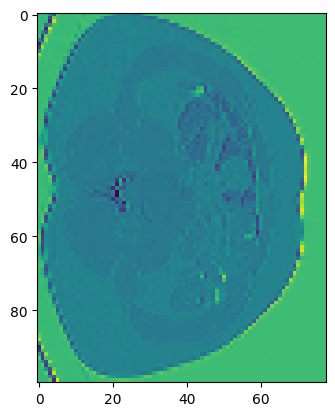

In [ ]:
from matplotlib import pyplot as plt


plt.imshow(healthy_pancreas_enc_imgs[0][:,:,0, 0])

# 2. Encode Images using VQ-GAN Encoder

<font color="color: #ff7f50;">

- [x] Take $96^3$ subcubes

- - [ ] Take different size subcubes? GAN wasn't trained on different sizes

</font>

- [x] <font color="gray"><s>Deal w/ padding</s></font>

<font color="blue">

## 2.1 Load Encoder model from DiffTumor

</font>

In [6]:
%cd STEP1.AutoencoderModel/

/scratch4/randalburns/DiffTumor/STEP1.AutoencoderModel


In [ ]:
import torch
from vq_gan_3d.model.vqgan import VQGAN
from torchvision import transforms
import nibabel as nib
import numpy as np

# Load the pretrained VQGAN model
vqgan_ckpt = '../STEP2.DiffusionModel/pretrained_models/AutoencoderModel.ckpt'
vqgan_model = VQGAN.load_from_checkpoint(vqgan_ckpt).cuda()
vqgan_model.eval()

In [8]:
%cd ..

/scratch4/randalburns/DiffTumor


## 2.2 Input Images into Encoder

Do not use Codebook for first run. Use plain Encoder output

- [ ] Fix error when running with Tiling
- [X] Loop over all images - both Healthy and Unhealthy
- [ ] Future: plot Codebook itself
- [X] <font color="gray"><s>Why 12 extra channels? Just no. tiles that fit in image</s></font>

In [14]:
from tqdm import tqdm

# Define a function to encode 3D CT scans using the encoder from VQGAN
def encode_ct_scan(img_data):
    img_data_tensor = torch.tensor(img_data, dtype=torch.float32).to(vqgan_model.device)
    img_data_tensor = img_data_tensor.unsqueeze(0).unsqueeze(0)  # Add batch and channel dimension (B, C, D, H, W)

    with torch.no_grad():
        encoded_img = vqgan_model.encode(img_data_tensor, quantize=False, include_embeddings=True)

    return encoded_img.cpu()


def encode_ct_scans_batch(img_data_batch, model, device='cuda', batch_size=16):
    """
    Encodes a batch of 3D CT scan cubes using the VQGAN encoder.

    Args:
        img_data_batch (torch.Tensor): Tensor of shape (N, 1, D, H, W).
        model (VQGAN): The pretrained VQGAN model.
        device (str): Device to perform computation on ('cuda' or 'cpu').
        batch_size (int): Number of samples to process in each sub-batch.

    Returns:
        torch.Tensor: Encoded tensor of shape (N, 8, 24, 24, 24).
    """
    encoded_batches = []
    num_samples = img_data_batch.size(0)
    
    with torch.no_grad():
        for start_idx in tqdm(range(0, num_samples, batch_size), desc="Encoding Batches"):
            end_idx = min(start_idx + batch_size, num_samples)
            batch = img_data_batch[start_idx:end_idx].to(device)  # Shape: (batch_size, 1, 96, 96, 96)
            
            # Pass through the encoder
            encoded = model.encode(batch, quantize=False, include_embeddings=True)  # Assuming output shape: (batch_size, 8, 24, 24, 24)
            
            encoded_batches.append(encoded.cpu())
    
    # Concatenate all encoded batches
    encoded_all = torch.cat(encoded_batches, dim=0)  # Shape: (N, 8, 24, 24, 24)
    return encoded_all

In [12]:
def encode_all_cts(all_sampled_cubes, vqgan_model, batch_size=16):
    """
    Encodes all CT scan cubes and returns the encoded tensor and corresponding patient IDs.

    Args:
        all_sampled_cubes (torch.Tensor): Tensor of shape [52, 55, 96, 96, 96].
        vqgan_model (VQGAN): The pretrained VQGAN model.
        batch_size (int): Batch size for encoding.

    Returns:
        torch.Tensor: Encoded tensor of shape [52, 55, 8, 24, 24, 24].
    """
    num_cts, num_cubes, D, H, W = all_sampled_cubes.shape
    total_cubes = num_cts * num_cubes

    # Reshape to [N, 1, D, H, W]
    all_cubes_reshaped = all_sampled_cubes.view(total_cubes, 1, D, H, W)  # Shape: [52*55, 1, 96, 96, 96]
    
    # Encode in batches
    encoded_cubes = encode_ct_scans_batch(all_cubes_reshaped, vqgan_model, device='cuda', batch_size=batch_size)
    # Shape: [52*55, 8, 24, 24, 24]
    
    # Reshape back to [52, 55, 8, 24, 24, 24]
    encoded_cubes_final = encoded_cubes.view(num_cts, num_cubes, 8, 24, 24, 24)
    
    return encoded_cubes_final

In [ ]:
all_encoded_cubes = encode_all_cts(all_sampled_cubes, vqgan_model, batch_size=16)


In [15]:
all_encoded_cubes = encode_all_cts(all_sampled_cubes, vqgan_model, batch_size=16)

Encoding Batches: 100%|███████████████████████████████████████████████████████████████████████████████████| 172/172 [00:23<00:00,  7.30it/s]


## Save Encoded data

In [16]:
def save_encoded_data(encoded_tensor, patient_ids, tensor_path='all_encoded_cubes.pt', ids_path='all_filtered_ids.pkl'):
    """
    Saves the encoded tensor and patient IDs to disk.

    Args:
        encoded_tensor (torch.Tensor): Encoded tensor to save.
        patient_ids (List[str]): List of patient IDs.
        tensor_path (str): File path to save the tensor.
        ids_path (str): File path to save the patient IDs.
    """
    import torch
    import pickle

    # Save the tensor
    torch.save(encoded_tensor, tensor_path)
    print(f"Encoded tensor saved to {tensor_path}")

    # Save the patient IDs
    with open(ids_path, 'wb') as f:
        pickle.dump(patient_ids, f)
    print(f"Patient IDs saved to {ids_path}")

In [17]:
save_encoded_data(all_encoded_cubes, all_filtered_ids, tensor_path='data/all_encoded_cubes.pt', ids_path='data/all_filtered_ids.pkl')

Encoded tensor saved to all_encoded_cubes.pt
Patient IDs saved to all_filtered_ids.pkl


# 3 Plot Encoded Images. How do these encoded image channels look like?
- [X] Use Gray cmap
- [x] Flip 90deg so front faces up
- [X] Re-create nii.gz file?

In [ ]:
enc_img = enc_healthy_cubes['BDMAP_00000002'][0].squeeze()

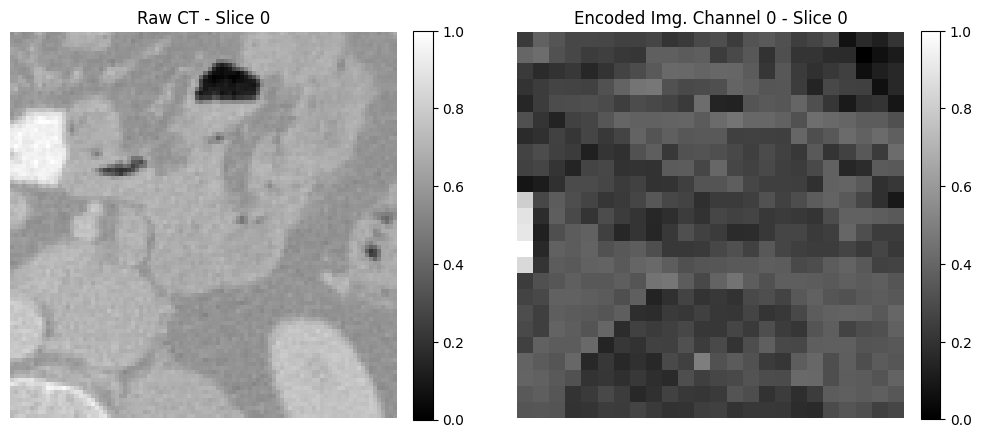

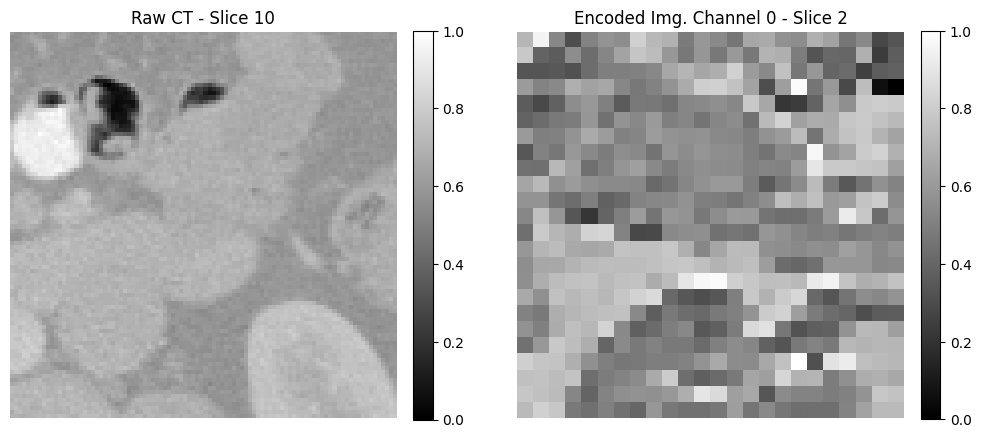

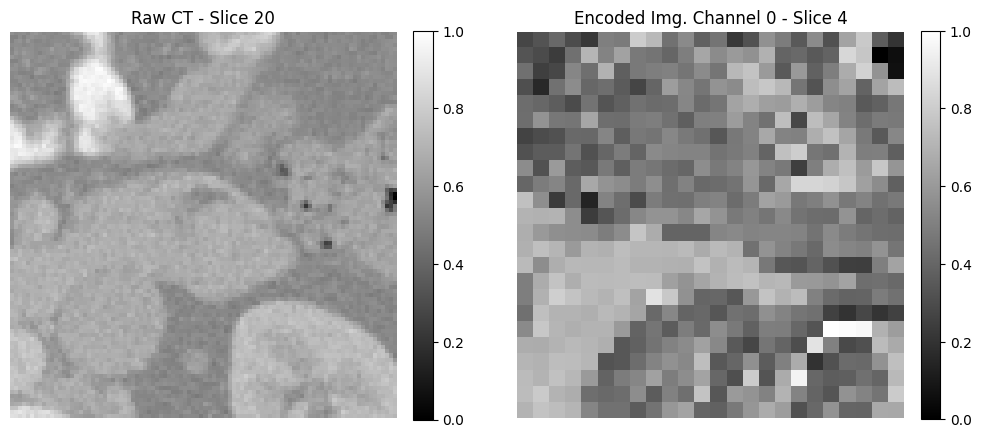

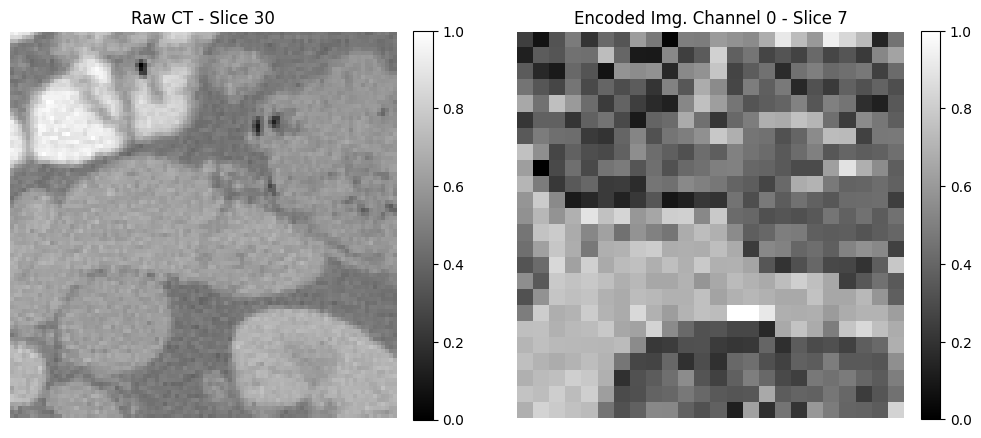

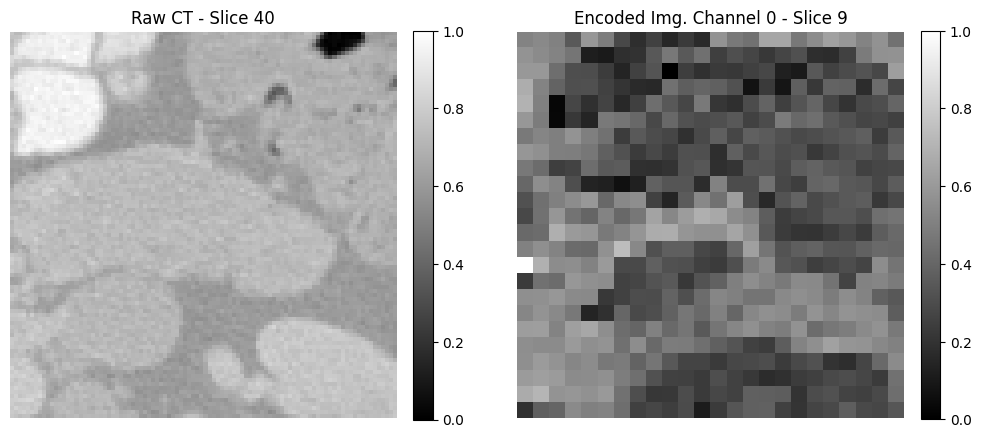

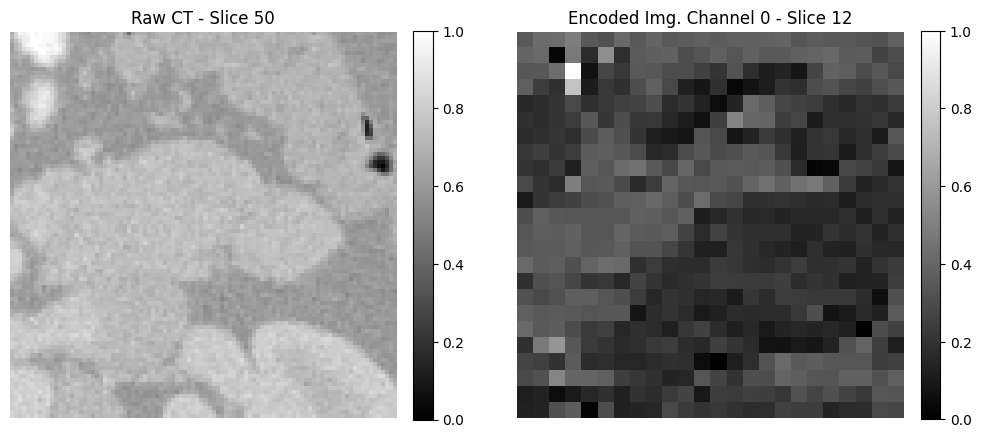

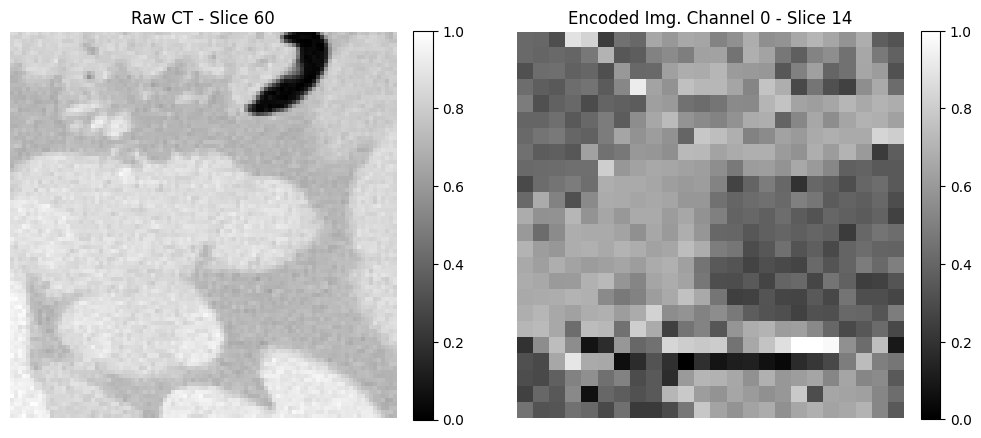

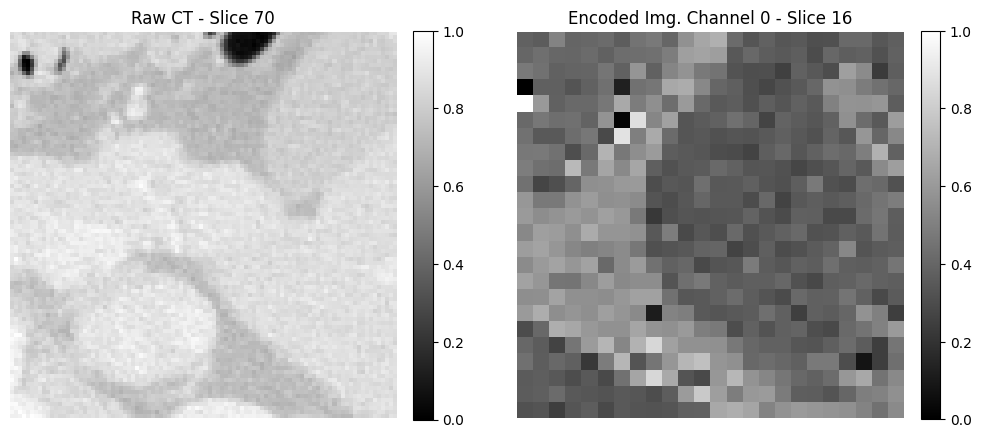

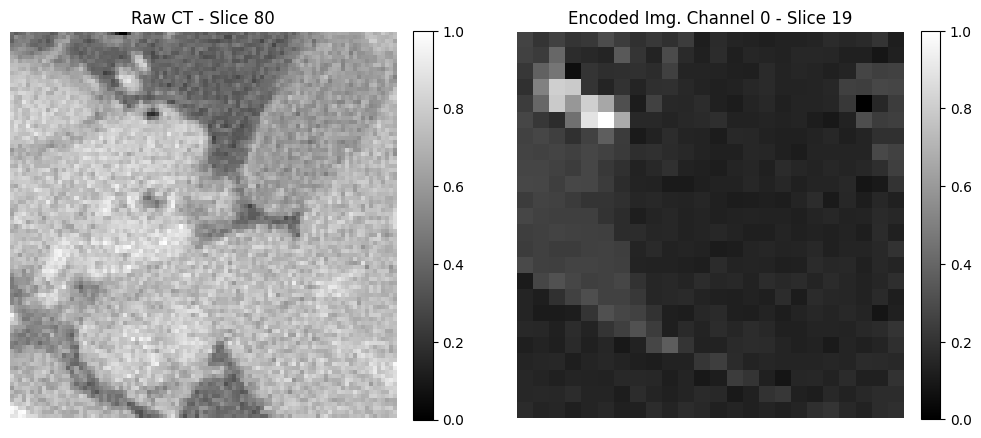

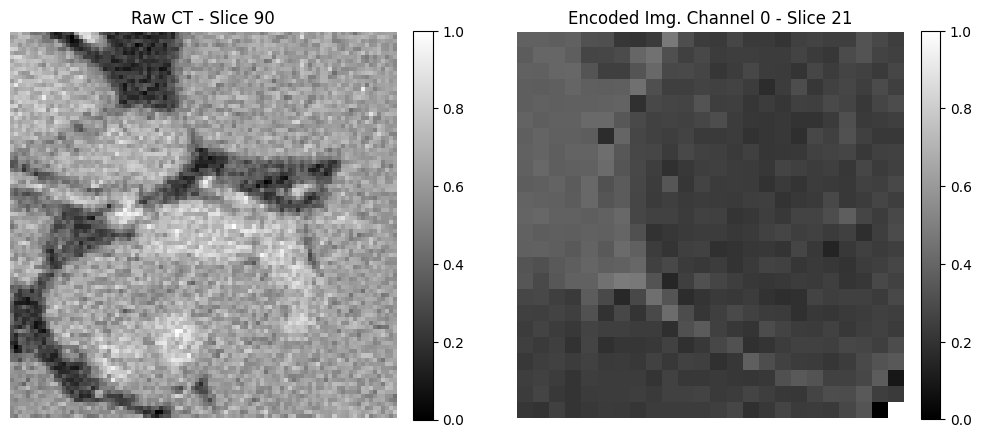

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Loop for side-by-side plotting
for i in range(10):  # Both loops generate 10 plots
    slice_idx_1 = i * 10  # From the first loop (0-96, step 10)
    slice_idx_2 = i * 2.4  # From the second loop (0-24), scaling to match the count

    # Create a figure with 2 subplots side by side
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

    # Rotate and normalize the first image
    img_1 = all_sampled_cubes[0, 0, :, :, int(slice_idx_1)].cpu().numpy()
    img_1_normalized = (img_1 - img_1.min()) / (img_1.max() - img_1.min())  # Normalization to [0, 1]
    rotated_img_1 = np.rot90(img_1_normalized)
    ax[0].imshow(rotated_img_1, cmap="gray")
    ax[0].set_title(f"Raw CT - Slice {int(slice_idx_1)}")
    ax[0].axis('off')  # Remove axis for cleaner visualization

    # Rotate and normalize the second image
    channel_idx = 0
    img_2 = enc_img[channel_idx, :, :, int(slice_idx_2)].cpu().numpy()
    img_2_normalized = (img_2 - img_2.min()) / (img_2.max() - img_2.min())  # Normalization to [0, 1]
    rotated_img_2 = np.rot90(img_2_normalized)
    ax[1].imshow(rotated_img_2, cmap="gray")
    ax[1].set_title(f"Encoded Img. Channel {channel_idx} - Slice {int(slice_idx_2)}")
    ax[1].axis('off')  # Remove axis for cleaner visualization

    # Add colorbars to each subplot
    fig.colorbar(ax[0].images[0], ax=ax[0], fraction=0.046, pad=0.04)
    fig.colorbar(ax[1].images[0], ax=ax[1], fraction=0.046, pad=0.04)

    # Display the figure
    plt.show()

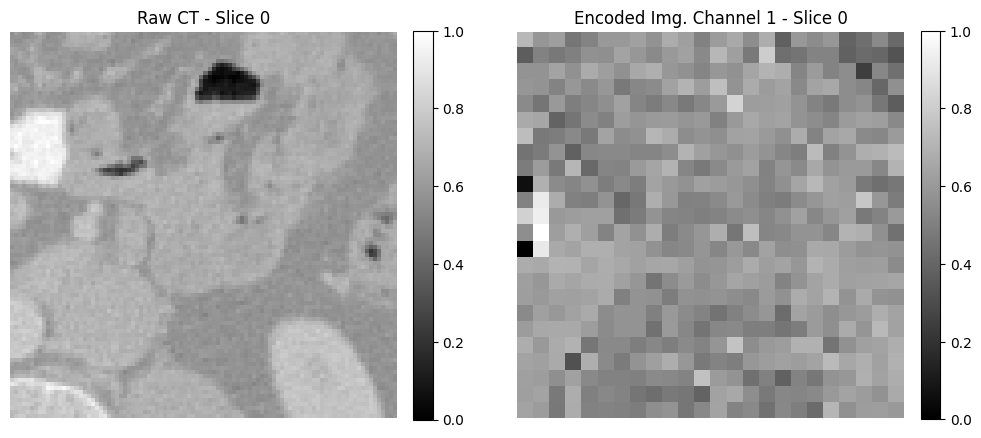

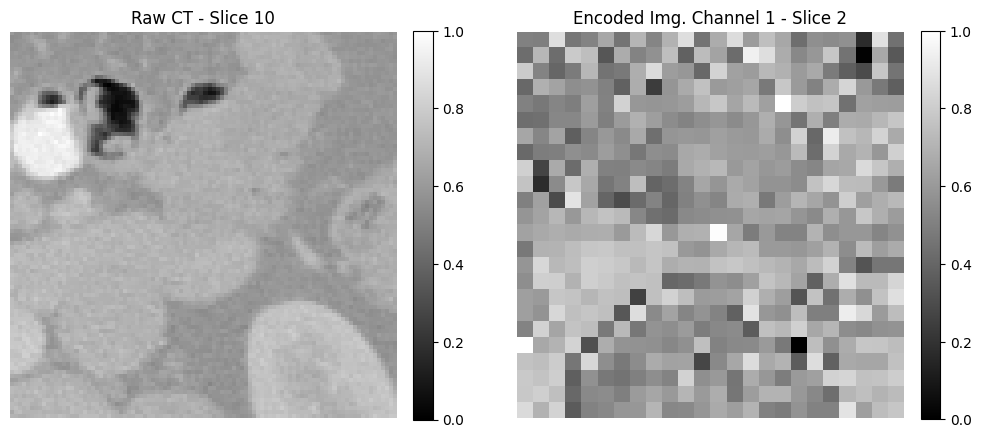

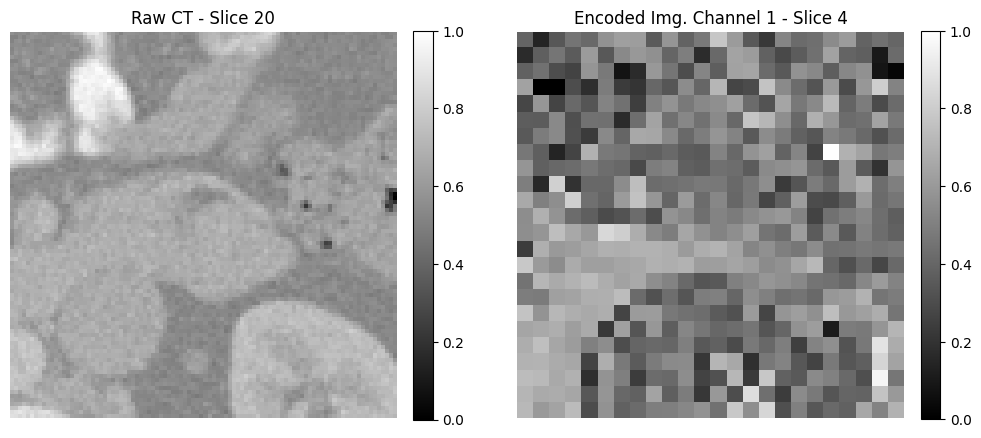

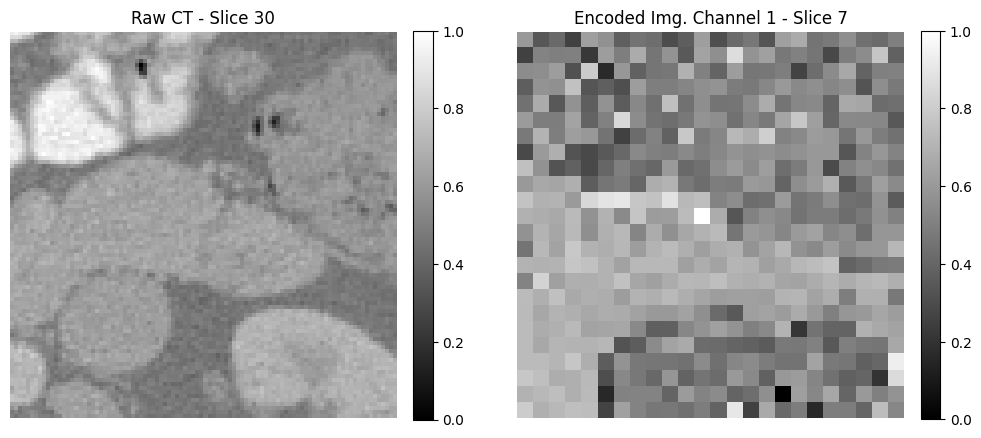

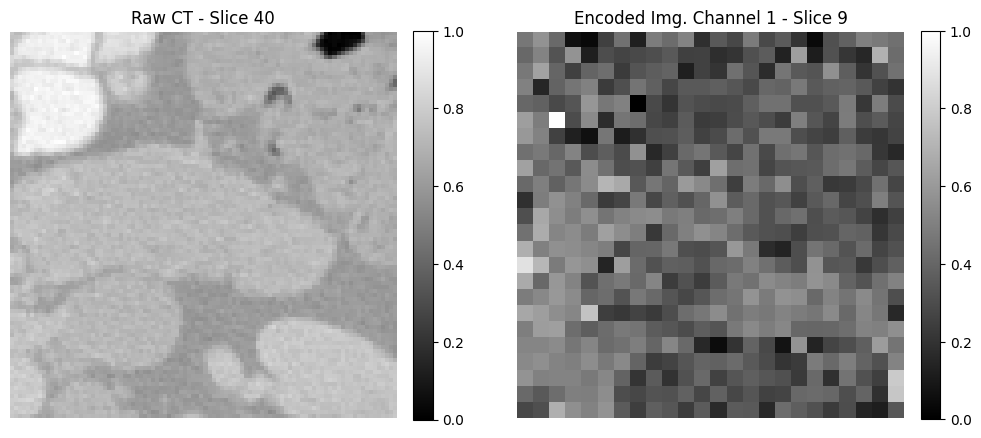

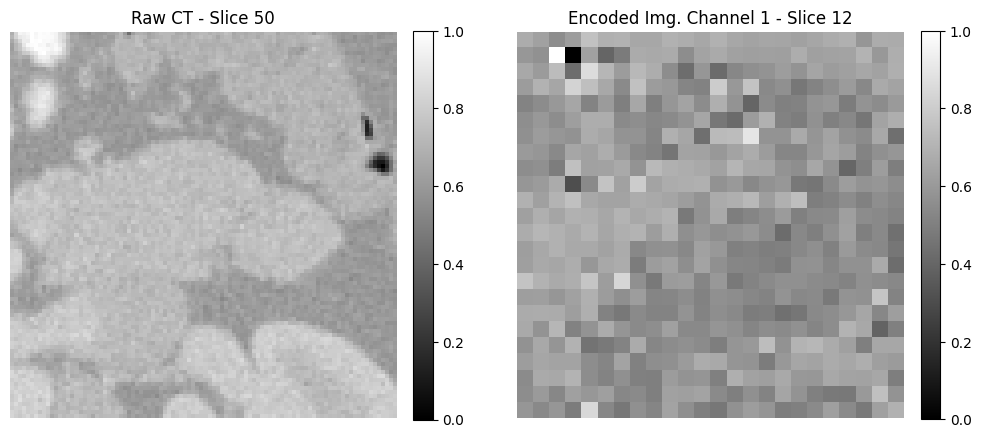

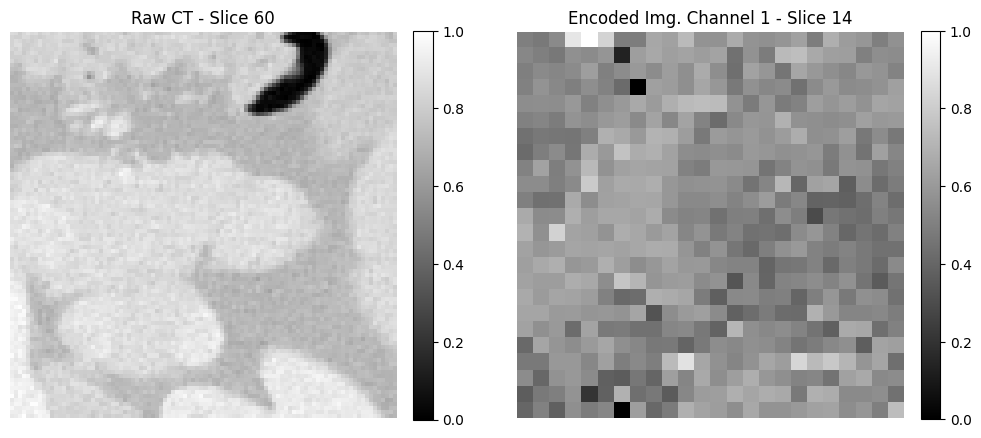

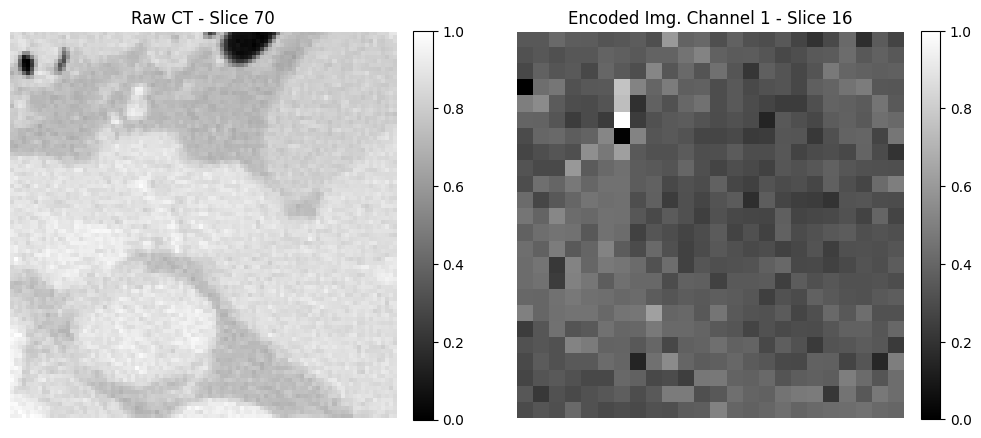

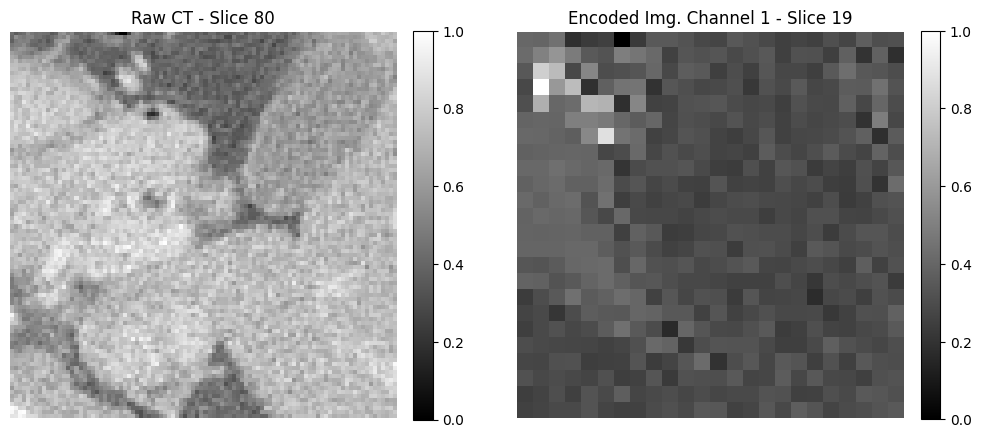

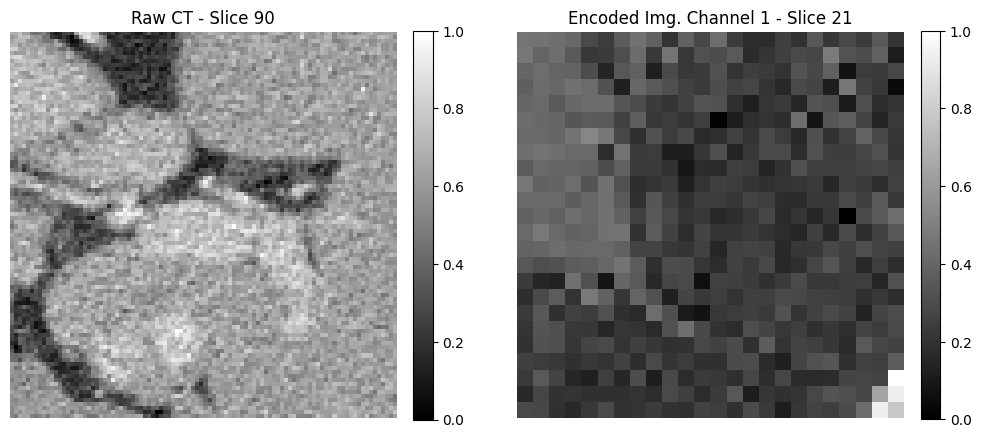

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Loop for side-by-side plotting
for i in range(10):  # Both loops generate 10 plots
    slice_idx_1 = i * 10  # From the first loop (0-96, step 10)
    slice_idx_2 = i * 2.4  # From the second loop (0-24), scaling to match the count

    # Create a figure with 2 subplots side by side
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

    # Rotate and normalize the first image
    img_1 = all_sampled_cubes[0, 0, :, :, int(slice_idx_1)].cpu().numpy()
    img_1_normalized = (img_1 - img_1.min()) / (img_1.max() - img_1.min())  # Normalization to [0, 1]
    rotated_img_1 = np.rot90(img_1_normalized)
    ax[0].imshow(rotated_img_1, cmap="gray")
    ax[0].set_title(f"Raw CT - Slice {int(slice_idx_1)}")
    ax[0].axis('off')  # Remove axis for cleaner visualization

    # Rotate and normalize the second image
    channel_idx = 1
    img_2 = enc_img[channel_idx, :, :, int(slice_idx_2)].cpu().numpy()
    img_2_normalized = (img_2 - img_2.min()) / (img_2.max() - img_2.min())  # Normalization to [0, 1]
    rotated_img_2 = np.rot90(img_2_normalized)
    ax[1].imshow(rotated_img_2, cmap="gray")
    ax[1].set_title(f"Encoded Img. Channel {channel_idx} - Slice {int(slice_idx_2)}")
    ax[1].axis('off')  # Remove axis for cleaner visualization

    # Add colorbars to each subplot
    fig.colorbar(ax[0].images[0], ax=ax[0], fraction=0.046, pad=0.04)
    fig.colorbar(ax[1].images[0], ax=ax[1], fraction=0.046, pad=0.04)

    # Display the figure
    plt.show()

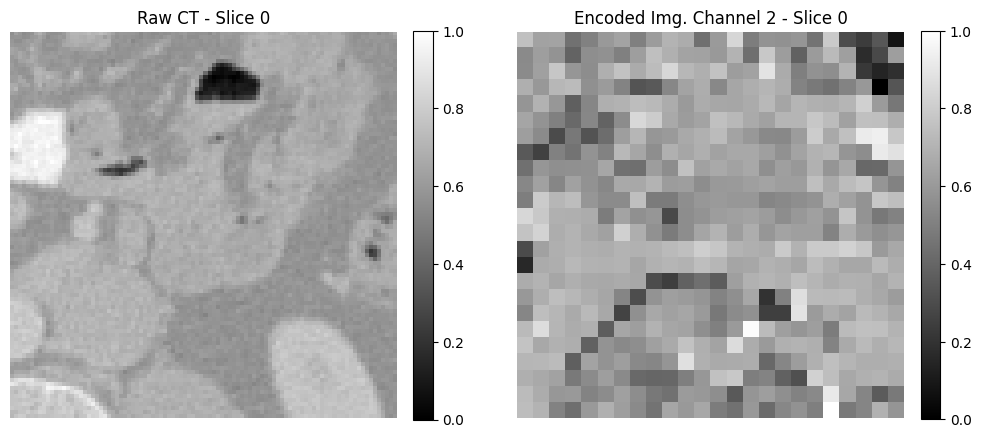

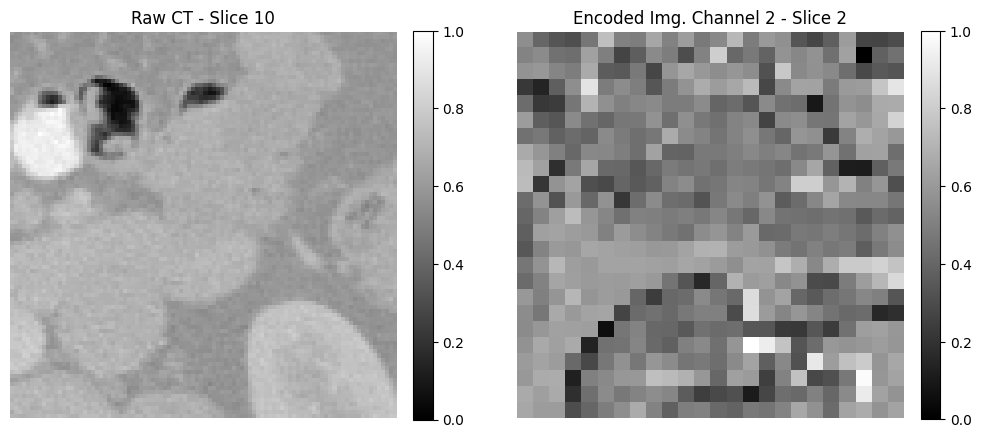

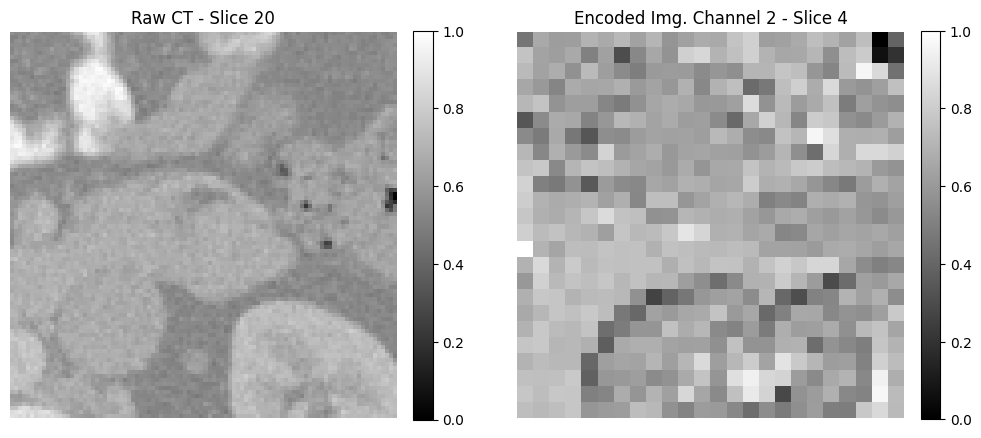

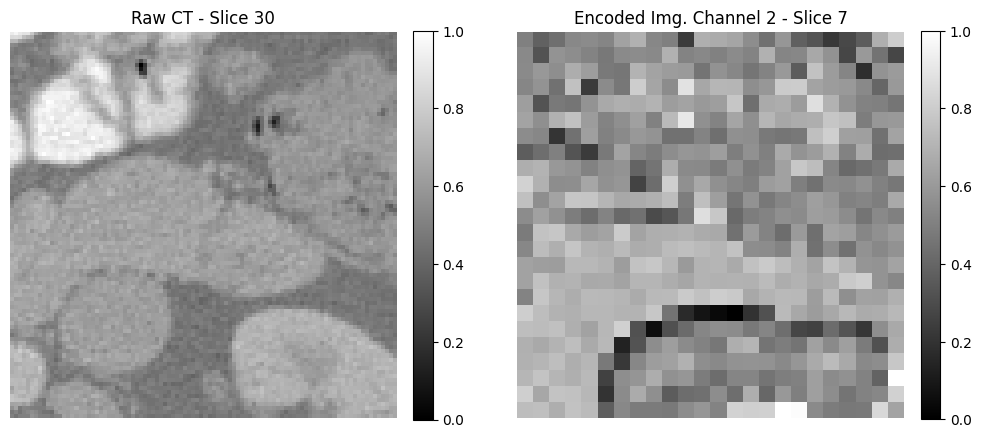

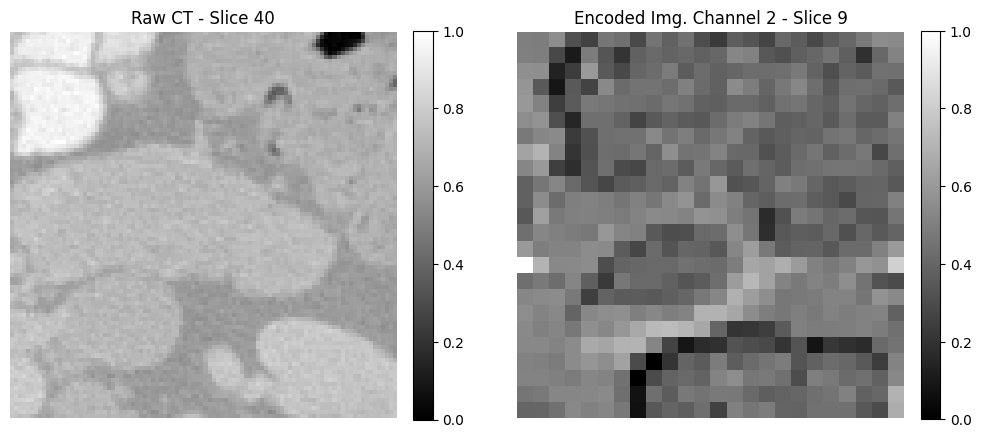

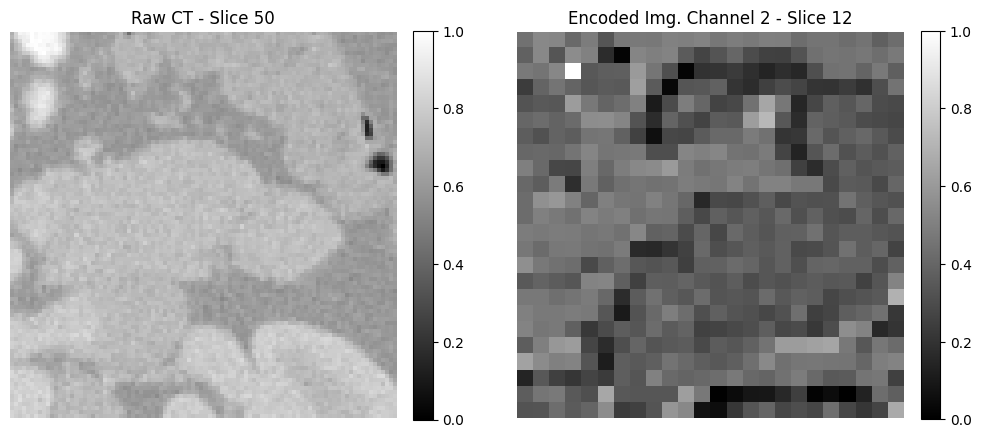

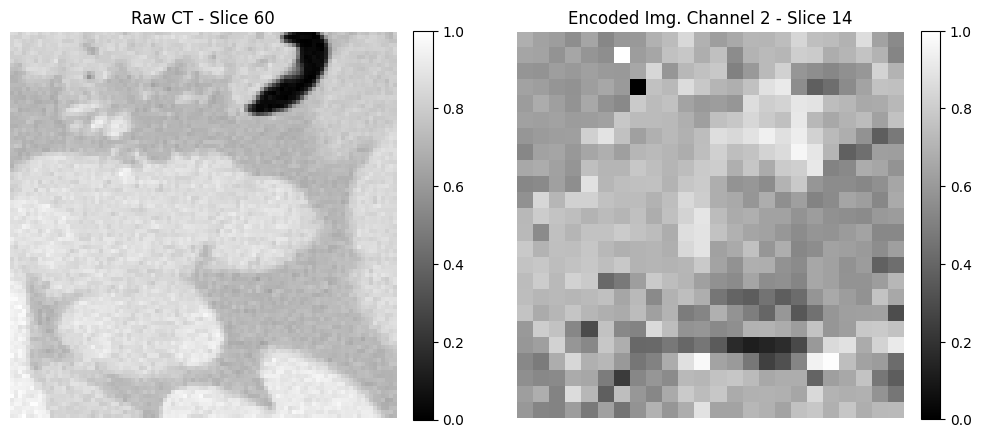

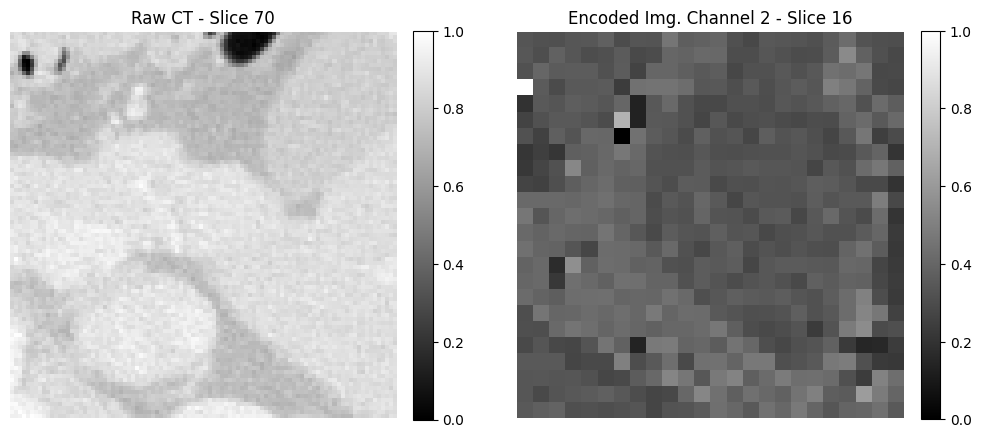

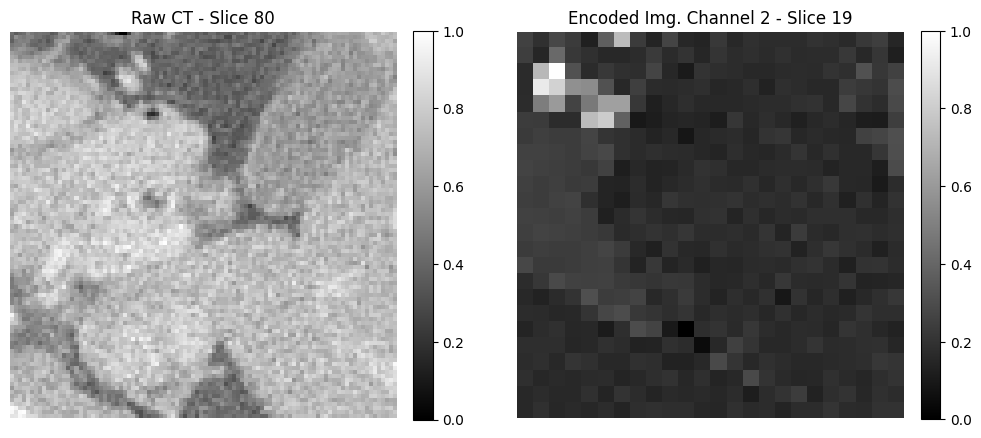

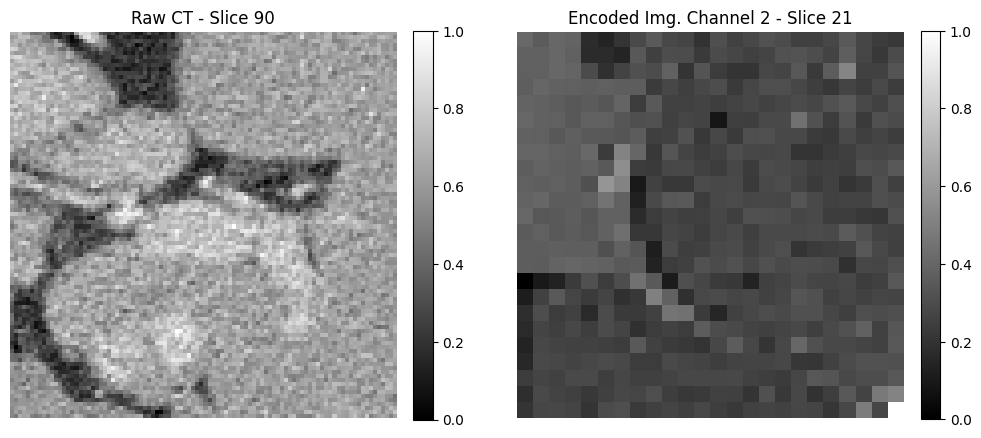

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Loop for side-by-side plotting
for i in range(10):  # Both loops generate 10 plots
    slice_idx_1 = i * 10  # From the first loop (0-96, step 10)
    slice_idx_2 = i * 2.4  # From the second loop (0-24), scaling to match the count

    # Create a figure with 2 subplots side by side
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

    # Rotate and normalize the first image
    img_1 = all_sampled_cubes[0, 0, :, :, int(slice_idx_1)].cpu().numpy()
    img_1_normalized = (img_1 - img_1.min()) / (img_1.max() - img_1.min())  # Normalization to [0, 1]
    rotated_img_1 = np.rot90(img_1_normalized)
    ax[0].imshow(rotated_img_1, cmap="gray")
    ax[0].set_title(f"Raw CT - Slice {int(slice_idx_1)}")
    ax[0].axis('off')  # Remove axis for cleaner visualization

    # Rotate and normalize the second image
    channel_idx = 2
    img_2 = enc_img[channel_idx, :, :, int(slice_idx_2)].cpu().numpy()
    img_2_normalized = (img_2 - img_2.min()) / (img_2.max() - img_2.min())  # Normalization to [0, 1]
    rotated_img_2 = np.rot90(img_2_normalized)
    ax[1].imshow(rotated_img_2, cmap="gray")
    ax[1].set_title(f"Encoded Img. Channel {channel_idx} - Slice {int(slice_idx_2)}")
    ax[1].axis('off')  # Remove axis for cleaner visualization

    # Add colorbars to each subplot
    fig.colorbar(ax[0].images[0], ax=ax[0], fraction=0.046, pad=0.04)
    fig.colorbar(ax[1].images[0], ax=ax[1], fraction=0.046, pad=0.04)

    # Display the figure
    plt.show()

In [25]:
list(enc_healthy_cubes.values())[0][0].shape

torch.Size([1, 8, 24, 24, 24])

<Figure size 640x480 with 0 Axes>

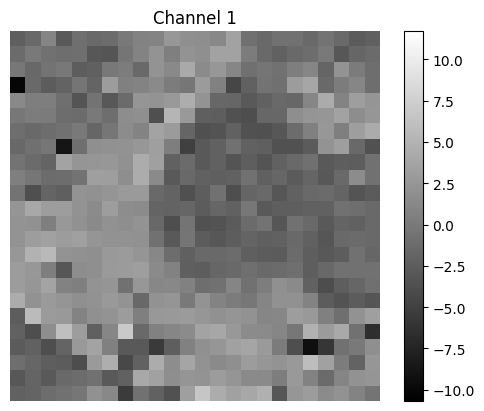

<Figure size 640x480 with 0 Axes>

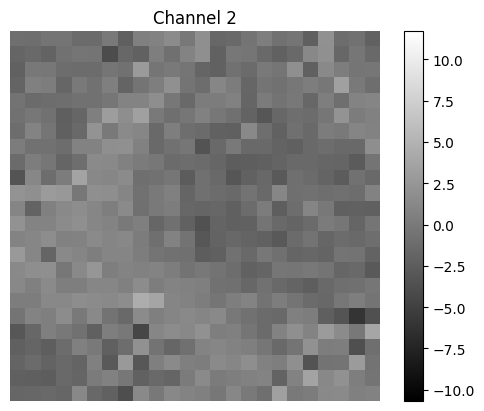

<Figure size 640x480 with 0 Axes>

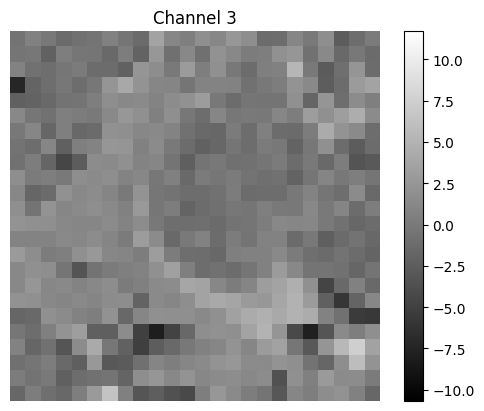

<Figure size 640x480 with 0 Axes>

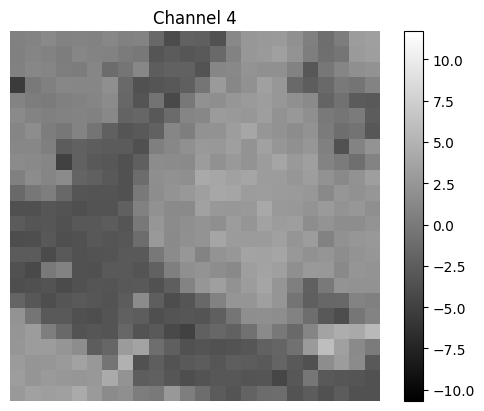

<Figure size 640x480 with 0 Axes>

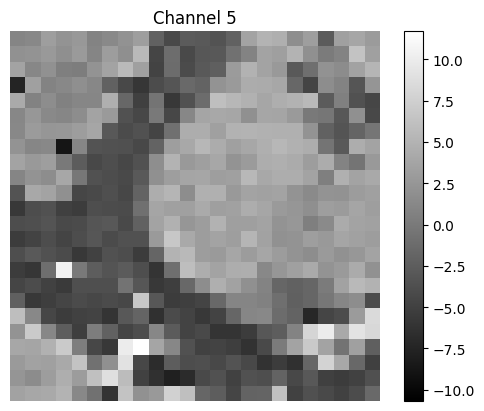

<Figure size 640x480 with 0 Axes>

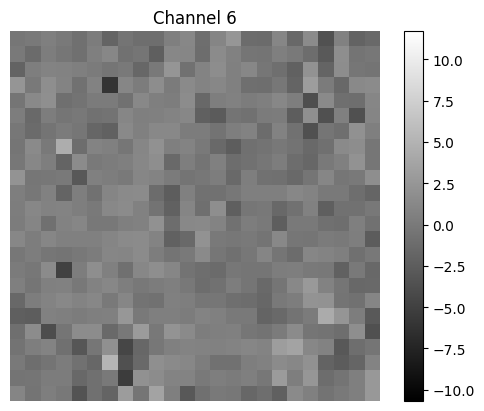

<Figure size 640x480 with 0 Axes>

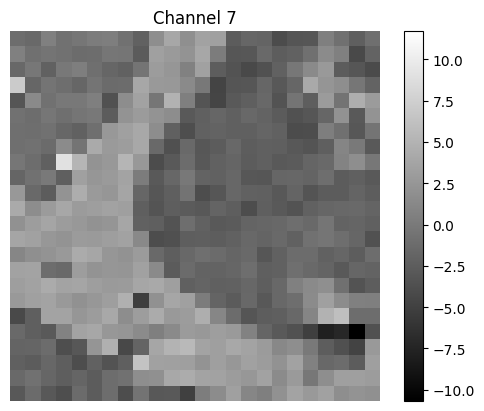

<Figure size 640x480 with 0 Axes>

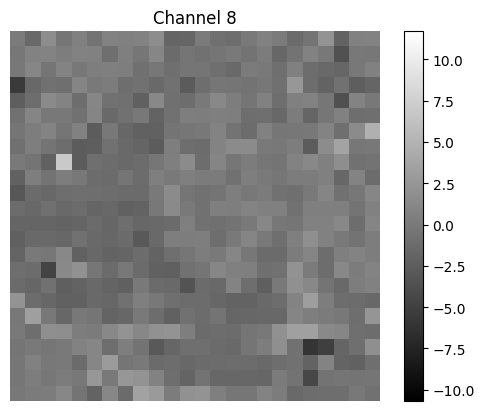

In [27]:
from matplotlib import pyplot as plt
import numpy as np

slice_idx = 15#60 // 4

vmin = enc_img[:, :, :, slice_idx].min().item()
vmax = enc_img[:, :, :, slice_idx].max().item()

for channel in range(enc_img.shape[0]):
    plt.figure()
    fig, ax = plt.subplots()

    # Rotate the image 90 degrees counterclockwise
    rotated_img = np.rot90(enc_img[channel, :, :, slice_idx].cpu().numpy())

    plt.imshow(rotated_img, vmin=vmin, vmax=vmax, cmap="gray")
    plt.title(f"Channel {channel+1}")

    plt.colorbar()
    
    plt.axis('off')  # Remove axis for cleaner visualization
    
    
    plt.show()

<font color="Purple">

#### GAN Hates -1000 Padded images, why?

</font>

gives checkerboard output